# Drunkard's walk

[(0, 0), (-1, 0), (-2, 0), (-1, 0), (-1, -1), (-1, -2), (-2, -2), (-2, -1), (-1, -1), (0, -1), (0, 0)]


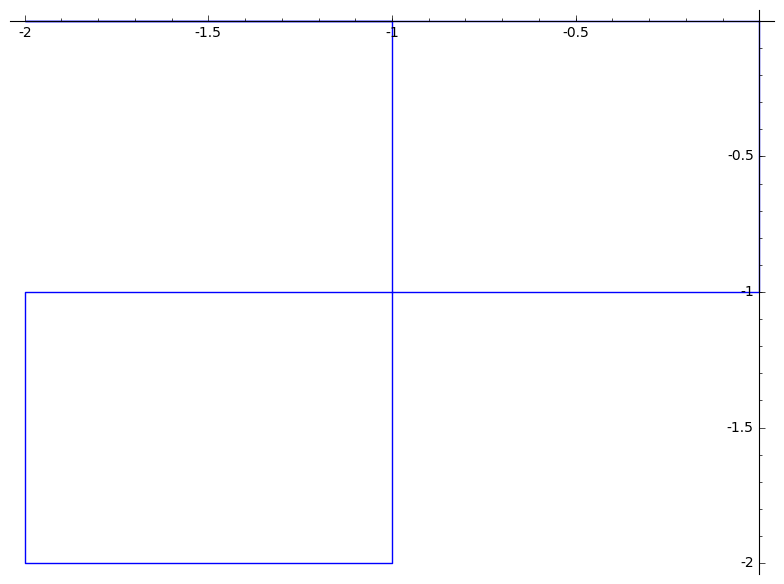

In [6]:
from pylab import cumsum, array

def makeLeftTurnPoint(listOfPoints):
    '''Function to make a point representing the destination of a left turn from the current path.
    
    Param listOfPoints is a list of tuples representing the path so far.
    Returns a new point to the immediate left of the last point in listOfPoints.

    Tuples in the list represent points in 2d space.
    The destination of a left turn is a tuple representing a point which on a 2d axis would
       be to the immediate left of the last point in the list representing the current path.'''
    newPoint = (0,0)  # a default return value
    if len(listOfPoints) > 0:  # check there is at least one point in the list
        lastPoint_x, lastPoint_y = listOfPoints[len(listOfPoints)-1]  # unpack the last point in the list
        new_x = lastPoint_x - 1  # a new x coordinate, one unit to the left of the last one in the list
        newPoint = (new_x, lastPoint_y)  # a new point one unit to the left of the last one in the list
    return newPoint


def  makeRightTurnPoint(listOfPoints):
    '''Function to make a point representing the destination of a right turn from the current path.
    
    Param listOfPoints is a list of tuples representing the path so far.
    Returns a new point to the immediate right of the last point in listOfPoints.

    Tuples in the list represent points in 2d space.
    The destination of a right turn is a tuple representing a point which on a 2d axis would
       be to the immediate right of the last point in the list representing the current path.'''
    
    newPoint = (0,0)  # a default return value
    if len(listOfPoints) > 0:  # check there is a least one point in the list
        lastPoint_x, lastPoint_y = listOfPoints[len(listOfPoints)-1]  # the last point in the list
        new_x = lastPoint_x + 1  # a new x coordinate one unit to the right of the last one in the list
        newPoint = (new_x, lastPoint_y) # a new point one unit to the right of the last one in the list
    return newPoint

def  makeUpTurnPoint(listOfPoints):
    newPoint = (0,0)   
    if len(listOfPoints) > 0:   
        lastPoint_x, lastPoint_y = listOfPoints[len(listOfPoints)-1]   
        new_y = lastPoint_y + 1  # a new x coordinate one unit to the right of the last one in the list
        newPoint = (lastPoint_x, new_y) # a new point one unit to the right of the last one in the list
    return newPoint

def  makeDownTurnPoint(listOfPoints):
    newPoint = (0,0)  # a default return value
    if len(listOfPoints) > 0:  # check there is a least one point in the list
        lastPoint_x, lastPoint_y = listOfPoints[len(listOfPoints)-1]  # the last point in the list
        new_y = lastPoint_y - 1  # a new x coordinate one unit to the right of the last one in the list
        newPoint = (lastPoint_x, new_y) # a new point one unit to the right of the last one in the list
    return newPoint

def linePlotter(listOfPoints):
    '''Function to plot a list of points as a lines between the points.
    
    Param listOfPoints is the list of points to plot lines between.'''
    
    l = line(listOfPoints)
    show(l)
    
startingPoint = (0,0)
drunkardsPath = [startingPoint] # start list with starting point tuple
n = 10
pUp, pDown, pLeft, pRight = 0.25, 0.25, 0.25, 0.25 # assign some probabilities to left, up, down
probs = [pUp, pDown, pLeft, pRight] # list of probabilities left and right only so far
movementFunctions = [makeUpTurnPoint, makeDownTurnPoint, makeLeftTurnPoint, makeRightTurnPoint] # list of corresponding movement functions
cumProbs = cumsum(probs).tolist() # cumulative probabilities
prns = [random() for i in range(n)] # pseudo-random Uniform(0,1) samples
for u in prns:                        # for each pseudo-random u
    for i in range(len(cumProbs)):    # for each cumulative direction probability
        if (u < cumProbs[i]):         # check if u is less than this direction cumulative probability
            pointToAdd = movementFunctions[i](drunkardsPath)  # if so, find new point to go to
            drunkardsPath.append(pointToAdd)                  # add it to the path
            break    # the break statement breaks out of a loop, in the case out of the for-loop
print(drunkardsPath)
# out of both loops, have a path, so plot it            
linePlotter(drunkardsPath)